In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [4]:
!ls

 ASLClassification	       kaggle.json
 batik_dataset		       __MACOSX
 batikology-dataset-main.zip   Manuk
 cats_and_dogs_filtered.zip    model.json
 CK+			       model.png
'CK+ augmented'		      'Murai Batu KOPSI 2021'
 group1-shard10of10.bin        pizza_steak
 group1-shard5of10.bin	       pizza_steak.zip
 group1-shard6of10.bin	       rice-diseases-image-dataset
 group1-shard7of10.bin	      'Sampel Manuk Murai'
 group1-shard8of10.bin	      'SDUMLA Database'
 group1-shard9of10.bin	       tomato_4_classes


## Download Dataset

In [5]:
import zipfile

In [6]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-09-24 09:38:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.110.128, 142.251.5.128, 74.125.206.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.110.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  41.6MB/s    in 12s     

2021-09-24 09:39:03 (40.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [7]:
import os

# walk through pizza steak directory
for dirpath , dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 10 directories and 0 images in 10_fo

In [10]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [11]:
import pathlib
import numpy as np
data_dir = pathlib.Path("10_food_classes_all_data/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [12]:
# visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


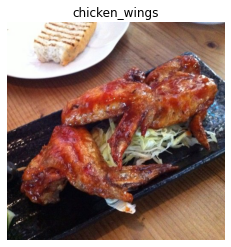

In [15]:
# view random image
img = view_random_image(target_dir ='10_food_classes_all_data/train/',
                        target_class = 'chicken_wings')

## Augmentation

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [20]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True)
# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 7500 images belonging to 10 classes.
Non-augmented training images:
Found 7500 images belonging to 10 classes.
Unchanged test images:
Found 2500 images belonging to 10 classes.


## Lets build our model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Try a simple CNN
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 64s 272ms/step - loss: 2.1466 - accuracy: 0.2235 - val_loss: 2.0555 - val_accuracy: 0.2588
Epoch 2/5
235/235 [==============================] - 63s 269ms/step - loss: 1.8424 - accuracy: 0.3736 - val_loss: 1.9239 - val_accuracy: 0.3256
Epoch 3/5
235/235 [==============================] - 64s 271ms/step - loss: 1.4366 - accuracy: 0.5240 - val_loss: 2.0078 - val_accuracy: 0.3128
Epoch 4/5
235/235 [==============================] - 63s 269ms/step - loss: 0.9026 - accuracy: 0.7179 - val_loss: 2.3406 - val_accuracy: 0.2968
Epoch 5/5
235/235 [==============================] - 63s 267ms/step - loss: 0.4776 - accuracy: 0.8621 - val_loss: 2.9894 - val_accuracy: 0.2664


In [26]:
# Plot the validation and training data separately
import matplotlib.pyplot as plt
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

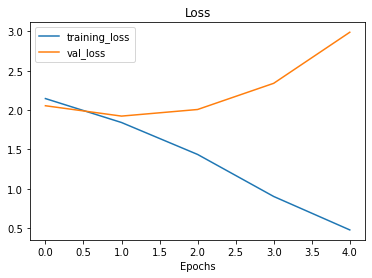

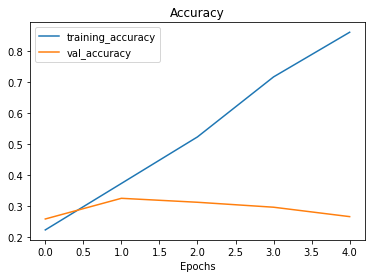

In [27]:
# check loss curve model
plot_loss_curves(history_1)

Hemmm, its seem our model overfit!! So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

In [28]:
# Clone the model (use the same architecture) and use data augmentation
model_2 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (same setup as used for model_10)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 136s 579ms/step - loss: 2.1868 - accuracy: 0.1988 - val_loss: 2.0198 - val_accuracy: 0.2832
Epoch 2/5
235/235 [==============================] - 136s 578ms/step - loss: 2.0514 - accuracy: 0.2712 - val_loss: 1.9840 - val_accuracy: 0.2924
Epoch 3/5
235/235 [==============================] - 136s 578ms/step - loss: 1.9996 - accuracy: 0.3003 - val_loss: 1.8463 - val_accuracy: 0.3612
Epoch 4/5
235/235 [==============================] - 135s 575ms/step - loss: 1.9691 - accuracy: 0.3176 - val_loss: 1.8510 - val_accuracy: 0.3572
Epoch 5/5
235/235 [==============================] - 135s 576ms/step - loss: 1.9405 - accuracy: 0.3297 - val_loss: 1.8338 - val_accuracy: 0.3676


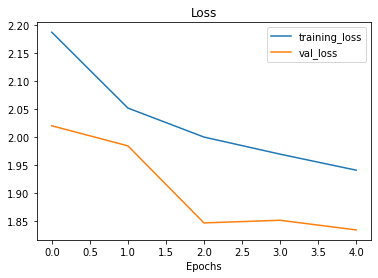

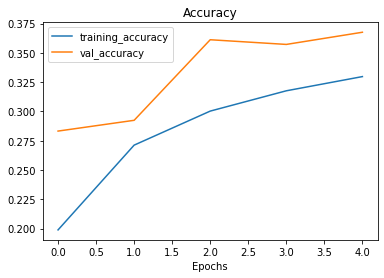

In [30]:
# check loss curve model
plot_loss_curves(history_2)

## Do yourself

Woohooo, i think we tackle the overfitting problem. but... what about the accuracy? its your turn, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.